# Data Visualization

Data visualizations with **seaborn**, a powerful but easy-to-use data visualization tool.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cbk_df = pd.read_csv('Key-CBK-Indicative-Exchange-Rates-2015.csv', index_col = 'Date', parse_dates = True)
cbk_df.head()

,Currency,Mean,Buy,Sell
Date,,,,
2015-02-01,US DOLLAR,90.7031,90.6239,90.7822
2015-02-01,STG POUND,140.9997,140.8611,141.1383
2015-02-01,EURO,109.3914,109.2844,109.4983
2015-02-01,SA RAND,7.8066,7.7973,7.8159
2015-02-01,KES / USHS,30.5944,30.5126,30.6762


**index_col="Date"** - When we load the dataset, we want each entry in the first column to denote a different row. To do this, we set the value of index_col to the name of the first column.

**parse_dates=True** - This tells the notebook to understand the each row label as a date (as opposed to a number or other text with a different meaning).

**Note:** You must select the indexing column with cbk_df.index, and it is not possible to use cbk_df['Date'] (which will return an error). This is because when we loaded the dataset, the "Date" column was used to index the rows. We always have to use this special notation to select the indexing column.

In [8]:
# select US DOlLAR entries from 2015-02-01 to 20/11/2015
cbk_df[cbk_df['Currency'] == 'US DOLLAR'].loc['2015-02-01': '20/11/2015'].head()

,Currency,Mean,Buy,Sell
Date,,,,
2015-02-01,US DOLLAR,90.7031,90.6239,90.7822
2015-05-01,US DOLLAR,90.7944,90.7056,90.8833
2015-06-01,US DOLLAR,90.8222,90.7417,90.9028
2015-07-01,US DOLLAR,90.9228,90.8450,91.0006
2015-08-01,US DOLLAR,91.1056,91.0306,91.1806


In [10]:
# get price of a particular currency on a particular date
def get_buy_price(Date, Currency):
    '''Takes in a date and a currency and returns the buying price of the currency on that particular date''' 
    buy_df = cbk_df[cbk_df['Currency'] == Currency].loc[Date]
    return buy_df['Buy'][0]

In [11]:
help(get_buy_price)

Help on function get_buy_price in module __main__:

get_buy_price(Date, Currency)
    Takes in a date and a currency and returns the buying price of the currency on that particular date



In [4]:
currencies = ['US DOLLAR','STG POUND','CHINESE YUAN','JPY (100)','EURO']
profit_loss_df = pd.DataFrame()

In [7]:
for currency in currencies:
    currency_buy = get_buy_price('21/01/2015', currency)
    # get selling price of a particular currency from 21/01/2015 to 20/11/2015
    currency_sell = cbk_df[cbk_df['Currency'] == currency].loc['21/01/2015' : '20/11/2015', 'Sell']
    # calculate profit/loss of a currency from 21/01/2015 to 20/11/2015
    profit_loss_df[currency] = currency_sell - currency_buy
    
profit_loss_df.head()

,US DOLLAR,STG POUND,CHINESE YUAN,JPY (100),EURO
Date,,,,,
2015-02-01,-0.7756,2.3122,-0.0970,-2.2781,3.4805
2015-05-01,-0.6745,0.0722,-0.1120,-2.2379,2.4994
2015-06-01,-0.6550,-0.0833,-0.0976,-1.2825,2.6672
2015-07-01,-0.5572,-1.0483,-0.0722,-1.1294,2.0861
2015-08-01,-0.3772,-1.2300,-0.0644,-1.5293,1.7989


## Line Charts

### Plot a line for every column in the dataset

Text(0, 0.5, 'Profit/Loss')

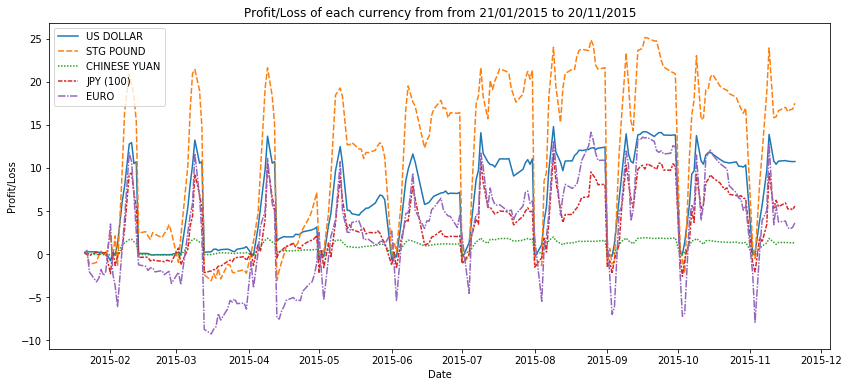

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Profit/Loss of each currency from from 21/01/2015 to 20/11/2015")

sns.lineplot(data = profit_loss_df)

# Add label for horizontal axis
plt.xlabel("Date")

# Add label for horizontal axis
plt.ylabel("Profit/Loss")

**sns.lineplot** tells the notebook that we want to create a line chart.

**sns** indicates that the command comes from the seaborn package.

### Plot a subset of the data

In [16]:
profit_loss_df.columns

Index(['US DOLLAR', 'STG POUND', 'CHINESE YUAN', 'JPY (100)', 'EURO'], dtype='object')

Text(0, 0.5, 'Profit/Loss')

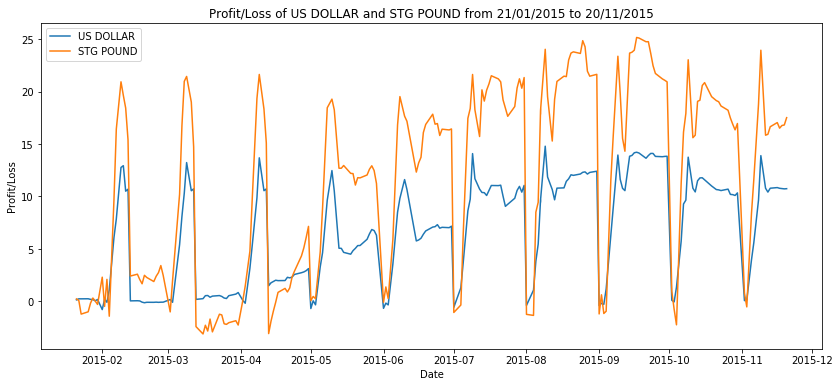

In [26]:
plt.figure(figsize=(14,6))

plt.title("Profit/Loss of US DOLLAR and STG POUND from 21/01/2015 to 20/11/2015")

sns.lineplot(data=profit_loss_df['US DOLLAR'], label="US DOLLAR")

sns.lineplot(data=profit_loss_df['STG POUND'], label="STG POUND")

plt.xlabel("Date")

plt.ylabel("Profit/Loss")

## Bar Charts

In [22]:
# get a sample of 5 currency entries on 2015-10-11
sample_cbk_df = cbk_df.loc['2015-10-11'].head()
sample_cbk_df

,Currency,Mean,Buy,Sell
Date,,,,
2015-10-11,US DOLLAR,102.2443,102.1444,102.3441
2015-10-11,STG POUND,154.2539,154.0806,154.4272
2015-10-11,EURO,109.8417,109.7172,109.9661
2015-10-11,SA RAND,7.1357,7.1265,7.1448
2015-10-11,KES / USHS,33.3027,33.2213,33.3841


Text(0, 0.5, 'Mean Price')

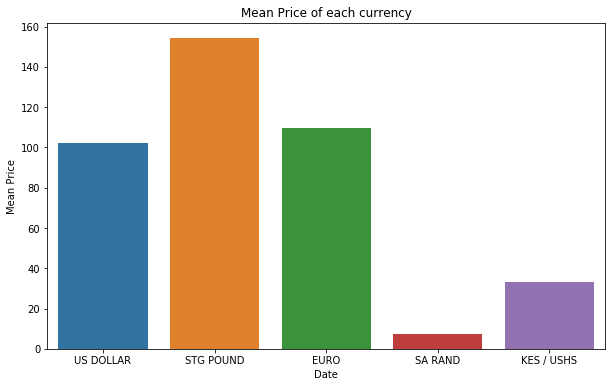

In [28]:
plt.figure(figsize=(10,6))

plt.title("Mean Price of each currency")

sns.barplot(x=sample_cbk_df['Currency'], y=sample_cbk_df['Mean'])

plt.xlabel("Date")

plt.ylabel("Mean Price")

## Heatmap
We create a heatmap to quickly visualize patterns and correlations.

In [31]:
profit_loss_df.corr()

,US DOLLAR,STG POUND,CHINESE YUAN,JPY (100),EURO
US DOLLAR,1.000000,0.966608,0.974719,0.939974,0.897680
STG POUND,0.966608,1.000000,0.964162,0.882684,0.921958
CHINESE YUAN,0.974719,0.964162,1.000000,0.879516,0.862694
JPY (100),0.939974,0.882684,0.879516,1.000000,0.903429
EURO,0.897680,0.921958,0.862694,0.903429,1.000000


Text(105.0, 0.5, 'Currency')

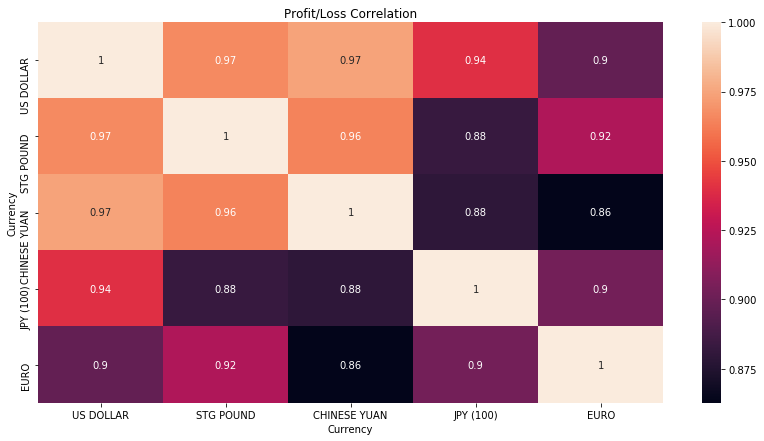

In [37]:
plt.figure(figsize=(14,7))

plt.title("Profit/Loss Correlation")

sns.heatmap(data=profit_loss_df.corr(), annot=True)

plt.xlabel("Currency")

plt.ylabel("Currency")

**annot=True** ensures that the values for each cell appear on the chart. (Leaving this out removes the values from each of the cells!)